In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime

In [2]:
prefix = 'glider_path_csvs/'

In [3]:
#the glider surfacing positions were originally stored as .dat files that approximated a space separated values lists
#converting them to csvs made it a little more uniform to read the values with pd and manipulate them
ram1 = pd.read_csv(prefix + 'ram1.csv', sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')
# print(ram1)

In [4]:
ram2 = pd.read_csv(prefix+'ram2.csv', sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')
ram3 = pd.read_csv(prefix+'ram3.csv', sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

In [5]:
# print(ram2)
# print(ram3)

In [6]:
# print(ram1.columns)

In [7]:
#I thought converting these 6 columns to a single datetime would make it easy to compare and order the data
#but it was already organized in time order, so it wasn't necessary this time
ram1['Time'] = pd.to_datetime(ram1[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])
# print(ram1)

In [8]:
ram1.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'], axis=1) 

,Latitude,Longitude,Time
0,3256.033,-7806.311,2012-01-25 16:55:06
1,3255.791,-7806.463,2012-01-25 17:22:52
2,3255.762,-7806.473,2012-01-25 17:27:42
3,3255.751,-7806.473,2012-01-25 17:30:24
4,3255.680,-7806.465,2012-01-25 17:42:03
5,3255.569,-7806.450,2012-01-25 18:02:53
6,3255.492,-7806.416,2012-01-25 18:12:27
7,3255.423,-7806.400,2012-01-25 18:26:39
8,3255.390,-7806.462,2012-01-25 18:54:09
9,3255.439,-7806.475,2012-01-25 19:17:24


In [9]:
ram2['Time'] = pd.to_datetime(ram2[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])
ram3['Time'] = pd.to_datetime(ram3[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])
ram2.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'], axis=1)
ram3.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'], axis=1)

,Latitude,Longitude,Time
0,3256.244,-7805.606,2012-03-16 15:32:15
1,3256.269,-7805.572,2012-03-16 15:35:37
2,3256.266,-7805.571,2012-03-16 15:36:24
3,3256.259,-7805.558,2012-03-16 15:39:40
4,3256.247,-7805.551,2012-03-16 15:49:32
5,3256.231,-7805.562,2012-03-16 16:04:07
6,3256.374,-7805.694,2012-03-16 16:44:14
7,3256.371,-7805.685,2012-03-16 16:46:33
8,3256.371,-7805.685,2012-03-16 16:47:23
9,3255.934,-7804.690,2012-03-16 18:59:56


In [10]:
import matplotlib.pyplot as plt

In [11]:
max_long = ram1['Longitude'].max()
print(max_long)

-7759.635


In [12]:
boundaries = (ram1['Latitude'].min(), ram1['Latitude'].max(), ram1['Longitude'].min(), ram1['Longitude'].max())
print(boundaries)
#did this at first so that we could plot the data on a shapefile of the nearby coastline
#the paths are far enough offshore I decided it wasn't worth the effort at this time

(3220.515, 3256.033, -7845.053000000001, -7759.635)


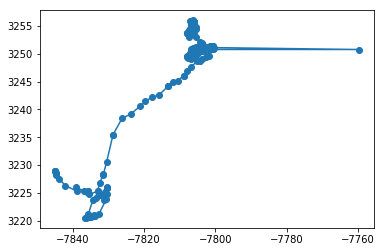

In [13]:
plt.plot(ram1['Longitude'], ram1['Latitude'], '-o')
plt.show()

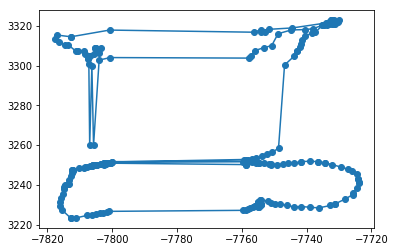

In [14]:
#Other than a couple of little outlier points, the route that the glider took is pretty clear here
#I'm going to plot the other two legs of the trip and see if they look similar
plt.plot(ram2['Longitude'], ram2['Latitude'], '-o')
plt.show()

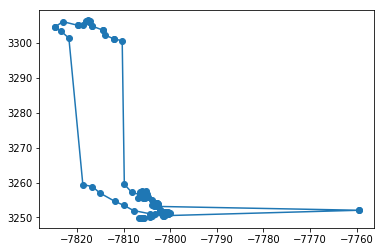

In [15]:
plt.plot(ram3['Longitude'], ram3['Latitude'], '-o')
plt.show()

In [16]:
#We don't know how this glider was planned to move around in this project yet, 
#but these initial paths don't seem horribly efficient
#all of them end up doing a bit of zig-zagging back and forth a bit. it may have a purpose, but I'm not sure what


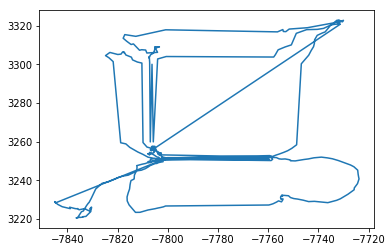

In [17]:
#just for fun, I'm going to combine and plot all of them at once
ram = ram1.append(ram2.append(ram3))
plt.plot(ram['Longitude'], ram['Latitude'], '')
plt.show()

In [18]:
#the Ramses glider didn't have the same issue as the Pelagia glider did where there was a week of no data
#but it still has some spots where it moved pretty large distances between surfacing,
#as shown by the long straight lines on the path
#the second leg of the trip is a very odd shape. It looks almost like the glider was trying to cirumvent some obstacles